In [1]:
from pathlib import Path
import sys
import os 
import matplotlib.pyplot as plt

project_root = Path.cwd().parent  # up one level
# project_root = Path.cwd().parent.parent  # up two levels, etc.
print("project_root:", project_root.resolve())

sys.path.append(project_root)

project_root: /mnt/home-data/lucas/projects/uoc/tfm/stock-options


In [2]:
import polars as pl 
data_dir = project_root / "data"
print("data_dir:", data_dir.resolve())

data_dir: /mnt/home-data/lucas/projects/uoc/tfm/stock-options/data


In [3]:
df = pl.read_csv(data_dir / "stock_data_2025_09_10.csv")
df

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""ABN.AS""","""2025-03-27""",20.280001,20.35,20.17,20.280001,20.280001,748681
"""HEIA.AS""","""2025-03-27""",74.980003,75.239998,74.519997,74.839996,74.839996,100558
"""INGA.AS""","""2025-03-27""",18.610001,18.816,18.514,18.733999,18.733999,2113426
"""RAND.AS""","""2025-03-27""",40.830002,42.0,40.830002,41.779999,41.779999,64286
"""TKWY.AS""","""2025-03-27""",19.6,19.6,19.530001,19.545,19.545,81920
…,…,…,…,…,…,…,…
"""YUM""","""2025-09-10""",145.419998,146.199997,144.850006,146.110001,146.110001,140555
"""ZBH""","""2025-09-10""",103.209999,104.07,102.949997,104.023598,104.023598,148346
"""ZBRA""","""2025-09-10""",311.959991,316.220001,311.470001,316.220001,316.220001,31543


# EDA (Exploratory Data Analysis)

In [4]:
df.describe()

statistic,company_code,date,open,high,low,close,adj_close,volume
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""5209715""","""5209715""",5.209715e6,5.209715e6,5.209715e6,5.209715e6,5.209715e6,5.209715e6
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,68.785529,69.672842,68.105762,69.041771,59.734213,5.9725e6
"""std""",null,null,443.190074,444.217834,438.174749,443.35152,427.178322,3.7029e7
"""min""","""A""","""1962-01-02""",0.0,0.001,0.001,0.001,-65.243881,0.0
"""25%""",null,null,8.631,9.1,8.8483,8.98,4.502104,433500.0
"""50%""",null,null,25.725016,26.125,25.469999,25.809999,16.865957,1.392735e6
"""75%""",null,null,58.119999,58.790001,57.472,58.139999,46.148441,3.821e6
"""max""","""ZTS""","""2025-09-10""",108601.0,109500.0,108001.0,109050.0,109050.0,9.2309e9


In [5]:
# Show first 5 rows
df.head()


company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""ABN.AS""","""2025-03-27""",20.280001,20.35,20.17,20.280001,20.280001,748681
"""HEIA.AS""","""2025-03-27""",74.980003,75.239998,74.519997,74.839996,74.839996,100558
"""INGA.AS""","""2025-03-27""",18.610001,18.816,18.514,18.733999,18.733999,2113426
"""RAND.AS""","""2025-03-27""",40.830002,42.0,40.830002,41.779999,41.779999,64286
"""TKWY.AS""","""2025-03-27""",19.6,19.6,19.530001,19.545,19.545,81920


In [6]:
# Show schema and dtypes
print("Schema:", df.schema)


Schema: Schema({'company_code': String, 'date': String, 'open': Float64, 'high': Float64, 'low': Float64, 'close': Float64, 'adj_close': Float64, 'volume': Int64})


In [7]:
# Show null counts
print("Null counts:")
print(df.null_count())

Null counts:
shape: (1, 8)
┌──────────────┬──────┬──────┬──────┬─────┬───────┬───────────┬────────┐
│ company_code ┆ date ┆ open ┆ high ┆ low ┆ close ┆ adj_close ┆ volume │
│ ---          ┆ ---  ┆ ---  ┆ ---  ┆ --- ┆ ---   ┆ ---       ┆ ---    │
│ u32          ┆ u32  ┆ u32  ┆ u32  ┆ u32 ┆ u32   ┆ u32       ┆ u32    │
╞══════════════╪══════╪══════╪══════╪═════╪═══════╪═══════════╪════════╡
│ 0            ┆ 0    ┆ 0    ┆ 0    ┆ 0   ┆ 0     ┆ 0         ┆ 0      │
└──────────────┴──────┴──────┴──────┴─────┴───────┴───────────┴────────┘


In [8]:
# Show descriptive statistics for numeric columns
df.describe()

statistic,company_code,date,open,high,low,close,adj_close,volume
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""5209715""","""5209715""",5.209715e6,5.209715e6,5.209715e6,5.209715e6,5.209715e6,5.209715e6
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,68.785529,69.672842,68.105762,69.041771,59.734213,5.9725e6
"""std""",null,null,443.190074,444.217834,438.174749,443.35152,427.178322,3.7029e7
"""min""","""A""","""1962-01-02""",0.0,0.001,0.001,0.001,-65.243881,0.0
"""25%""",null,null,8.631,9.1,8.8483,8.98,4.502104,433500.0
"""50%""",null,null,25.725016,26.125,25.469999,25.809999,16.865957,1.392735e6
"""75%""",null,null,58.119999,58.790001,57.472,58.139999,46.148441,3.821e6
"""max""","""ZTS""","""2025-09-10""",108601.0,109500.0,108001.0,109050.0,109050.0,9.2309e9


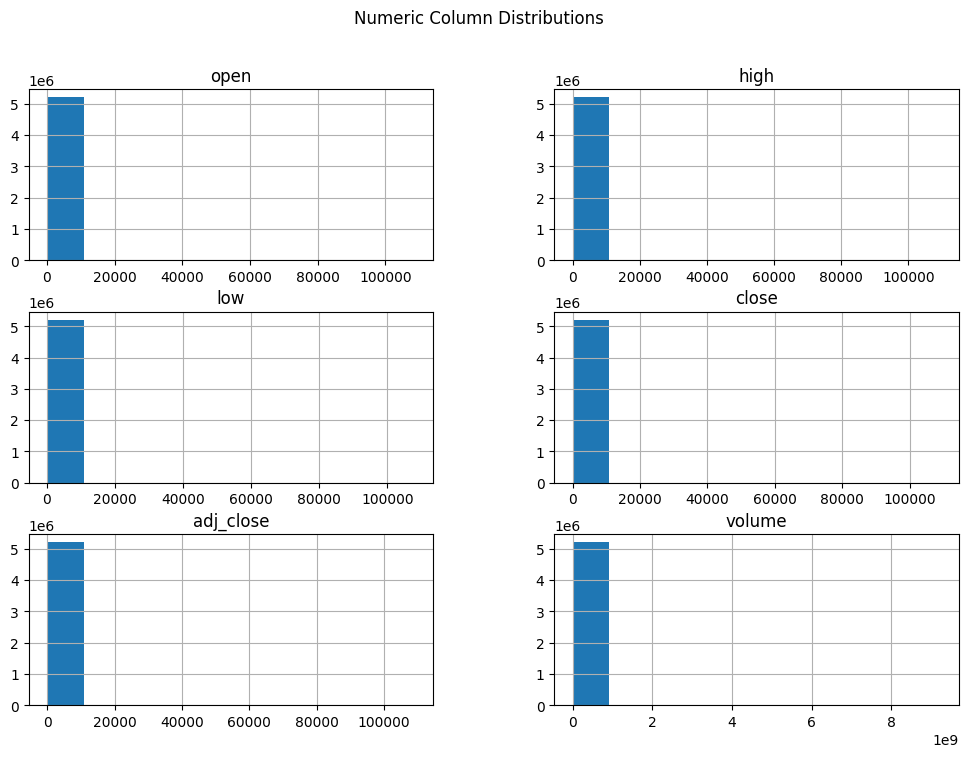

In [9]:
num_cols = [col for col, dtype in df.schema.items() if dtype in (pl.Float64, pl.Int64, pl.Float32, pl.Int32)]
if num_cols:
    df_pd = df.select(num_cols).to_pandas()
    df_pd.hist(bins=10, figsize=(12, 8))
    plt.suptitle("Numeric Column Distributions")
    plt.show()
else:
    print("No numeric columns to plot.")

## Companies
I want to know how many companies there are, and information about them all

In [10]:
companies = df.group_by("company_code").len().sort("len")
print(f"There are {companies.height} unique companies.")

There are 683 unique companies.


how many data has each company?

In [11]:
companies["len"].describe()

statistic,value
str,f64
"""count""",683.0
"""null_count""",0.0
"""mean""",7627.693997
"""std""",3990.131914
"""min""",1.0
"""25%""",4620.0
"""50%""",7225.0
"""75%""",11281.0
"""max""",16007.0


In [17]:
companies["len"].plot.hist()

alt.Chart(...)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analizar las variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.show()


AttributeError: 'DataFrame' object has no attribute 'select_dtypes'

In [ ]:
companies["number_of_records"] = )

AttributeError: 'DataFrame' object has no attribute 'groupby'